## Importamos librerias que vamos a utilizar


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Extraemos datos del Excel para procesarlos en un dataset

In [2]:
facts = pd.read_excel(open('homicidios.xlsx', 'rb'),
              sheet_name='HECHOS')  

In [3]:
factvic = pd.read_excel(open('homicidios.xlsx', 'rb'),
              sheet_name='VICTIMAS')  

Iniciamos el analisis


In [4]:
# Visualizamos las primeras filas del conjunto de datos para la tabla "HECHOS"
facts.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [5]:
# Visualizamos las primeras filas del conjunto de datos para la tabla "VICTIMAS"
factvic.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [6]:
# Obtenemos información general sobre los datos de ambas tablas
facts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [7]:
factvic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [8]:
# Observamos Estadísticas descriptivas básicas sobre ambas tablas
facts.describe()

,N_VICTIMAS,FECHA,AAAA,MM,DD,Altura,COMUNA
count,696.000000,696,696.000000,696.000000,696.000000,129.000000,696.000000
mean,1.030172,2018-09-14 05:12:24.827586048,2018.188218,6.692529,15.936782,3336.635659,7.425287
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,30.000000,0.000000
25%,1.000000,2017-04-02 12:00:00,2017.000000,4.000000,9.000000,1359.000000,4.000000
50%,1.000000,2018-07-12 12:00:00,2018.000000,7.000000,16.000000,2551.000000,8.000000
75%,1.000000,2020-01-04 06:00:00,2020.000000,10.000000,23.000000,4500.000000,11.000000
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,16080.000000,15.000000
std,0.179393,NaN,1.683754,3.571309,8.639646,3060.641793,4.387050


In [9]:
factvic.describe()

,FECHA,AAAA,MM,DD
count,717,717.000000,717.000000,717.000000
mean,2018-09-09 01:36:24.100418304,2018.174338,6.688982,15.960948
min,2016-01-01 00:00:00,2016.000000,1.000000,1.000000
25%,2017-04-01 00:00:00,2017.000000,4.000000,9.000000
50%,2018-07-07 00:00:00,2018.000000,7.000000,16.000000
75%,2019-12-18 00:00:00,2019.000000,10.000000,23.000000
max,2021-12-30 00:00:00,2021.000000,12.000000,31.000000
std,NaN,1.672655,3.575140,8.683358


In [10]:
# Hacemos un chequeo para identificar los valores nulos presentes en ambas tablas
print(facts.isnull().sum())

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64


In [11]:
print(factvic.isnull().sum())

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64


In [ ]:
# Luego de analizar los datos de las tablas de Hechos y Victimas, vamos a proceder a descartar las columnas que no aportan información adicional a la tarea que nos interesa para esta propuesta de trabajo, como asi tambien las que contienen valores nulos y duplicados que se encuentran en la misma situación

factvic = factvic.drop('FECHA', axis=1)
factvic = factvic.drop('FECHA_FALLECIMIENTO', axis=1)

In [15]:
facts['dia_semana'] = facts['FECHA'].dt.dayofweek
facts = facts.drop('HORA', axis=1)
facts = facts.drop('Calle', axis=1)
facts = facts.drop('Altura', axis=1)
facts = facts.drop('XY (CABA)', axis=1)
facts = facts.drop('Cruce', axis=1)
facts = facts.drop('Dirección Normalizada', axis=1)

In [16]:
facts['dia_semana'] = facts['dia_semana'].astype('Int64') 

In [17]:
# Marcamos las variables categoricas en los nuevos dataframes 
facts['LUGAR_DEL_HECHO'] = facts['LUGAR_DEL_HECHO'].astype('category')
facts['TIPO_DE_CALLE'] = facts['TIPO_DE_CALLE'].astype('category')
facts['VICTIMA'] = facts['VICTIMA'].astype('category')
facts['ACUSADO'] = facts['ACUSADO'].astype('category')
facts['PARTICIPANTES'] = facts['PARTICIPANTES'].astype('category')

In [18]:
factvic['ROL'] = factvic['ROL'].astype('category')
factvic['VICTIMA'] = factvic['VICTIMA'].astype('category')
factvic['SEXO'] = factvic['SEXO'].astype('category')

In [19]:
# Renombramos las columnas necesarias para una mejor interpretacion
facts = facts.rename(columns={"dia_semana":"DIA_SEMANA"})
facts = facts.rename(columns={"pos x":"LATITUDE","pos y":"LONGITUDE"})
factvic = factvic.rename(columns={"ID_hecho":"ID"})

In [20]:
facts.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,LATITUDE,LONGITUDE,PARTICIPANTES,VICTIMA,ACUSADO,DIA_SEMANA
0,2016-0001,1,2016-01-01,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,4
1,2016-0002,1,2016-01-02,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,5
2,2016-0003,1,2016-01-03,2016,1,3,7,AV ENTRE RIOS 2034,AVENIDA,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,6
3,2016-0004,1,2016-01-10,2016,1,10,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,8,-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,6
4,2016-0005,1,2016-01-21,2016,1,21,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,1,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,3


In [21]:
factvic.head()

,ID,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD
0,2016-0001,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19
1,2016-0002,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70
2,2016-0003,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30
3,2016-0004,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18
4,2016-0005,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29


In [22]:
# Revisamos si tenemos datos duplicados
factvic.duplicated().sum()

0

In [23]:
facts.duplicated().sum()

0

In [24]:
# Pasamos a numericas las variables a fin de poder tratar sus datos
# Cambio el dato horas  a tipo de dato numerico y luego a entero 
facts["HH"] = pd.to_numeric(facts ["HH"], errors="coerce")
facts["HH"] = facts["HH"].astype("Int64")

factvic["EDAD"] = pd.to_numeric(factvic["EDAD"], errors="coerce")
factvic["EDAD"] = factvic["EDAD"].astype("Int64")
factvic["EDAD"] = factvic["EDAD"].replace([" ","SD"], np.nan)
factvic["EDAD"] = factvic["EDAD"].fillna(0.0)

Text(0, 0.5, 'Número de Víctimas')

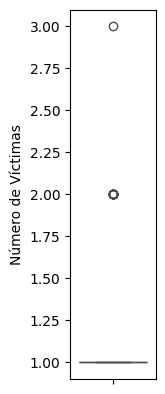

In [30]:
# Evaluamos si tenemos outliers en variables numricas
plt.subplot(1, 5, 1) 
sns.boxplot(data=facts, y='N_VICTIMAS', color = "grey")
plt.ylabel('Número de Víctimas')

Text(0, 0.5, 'Hora de siniestro')

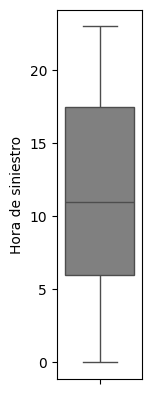

In [31]:
plt.subplot(1, 5, 1) 
sns.boxplot(data=facts, y='HH', color = "grey")
plt.ylabel('Hora de siniestro')

Text(0, 0.5, 'Rango etareo de Víctimas')

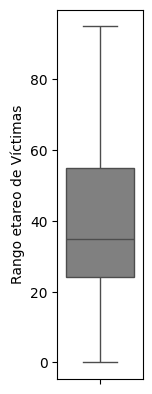

In [32]:
plt.subplot(1, 5, 1) 
sns.boxplot(data=factvic, y='EDAD', color = "grey")
plt.ylabel('Rango etareo de Víctimas')

No se encuentran outliers en las muestra evaluadas, en el Numero de victimas se aprecian dos outliers que a los fines del analisis no son representativos por lo cual optamos por dejarlos

In [33]:
# Eliminamos las columnas repetidas para unficar los dataset
factvic = factvic.drop(['AAAA', 'MM', 'DD', 'VICTIMA'], axis=1)

# Unificamos los dataset con los datos relevantes para procesarlos
data_siniestros= pd.merge(facts, factvic, on='ID')
data_siniestros.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'COMUNA', 'LATITUDE', 'LONGITUDE',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'DIA_SEMANA', 'ROL', 'SEXO',
       'EDAD'],
      dtype='object')

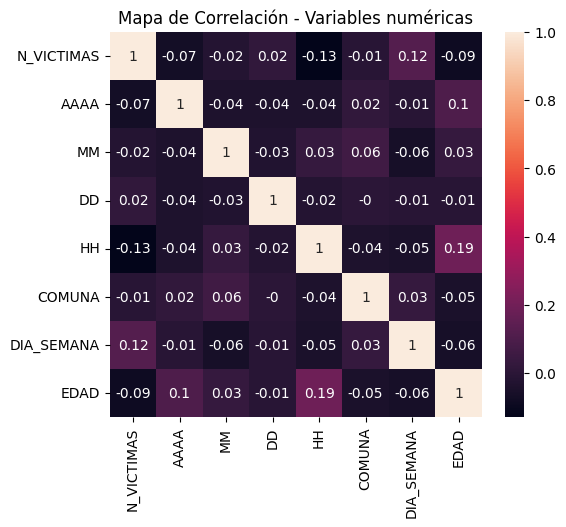

In [34]:
# Generamos un mapa de calor con las correlaciones de los todos los datos que contengan números 
dataNumerica = data_siniestros.select_dtypes(include=['number']) 
corr = dataNumerica.corr().round(2)

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True)
plt.title('Mapa de Correlación - Variables numéricas')
plt.show()

Observamos poca correlacion entre las variables, de las cuales se puede destacar HH (Hora) y Edad con 0.19 que seria la mas alta encontrada 

Observamos poca correlacion entre las variables, \n    de las cuales se puede destacar HH (Hora) y Edad con 0.19 \n    que seria la mas alta encontrada

Evaluamos los tipos de accidentes con mayor incidencias

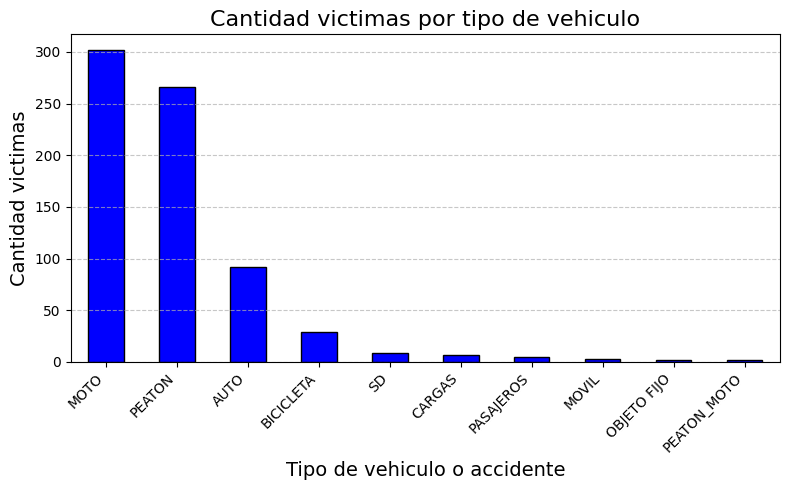

In [35]:
f=data_siniestros.value_counts('VICTIMA')
plt.figure(figsize=(8, 5))
f.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Cantidad victimas por tipo de vehiculo', fontsize=16)
plt.xlabel('Tipo de vehiculo o accidente', fontsize=14)
plt.ylabel('Cantidad victimas', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

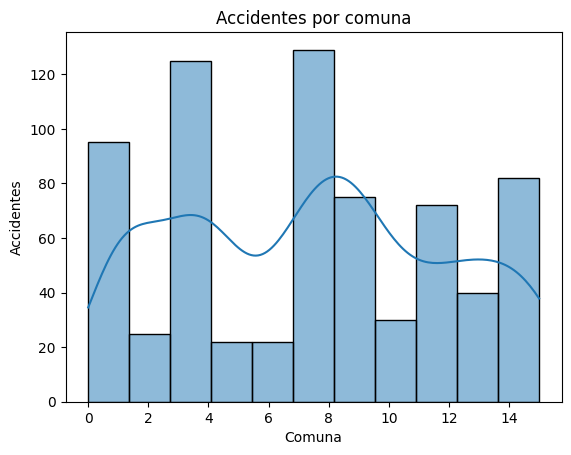

In [36]:
# Visualización de la distribución de accidentes por Comunas
sns.histplot(data_siniestros['COMUNA'], kde=True)
plt.title('Accidentes por comuna')
plt.xlabel('Comuna')
plt.ylabel('Accidentes')
plt.show()

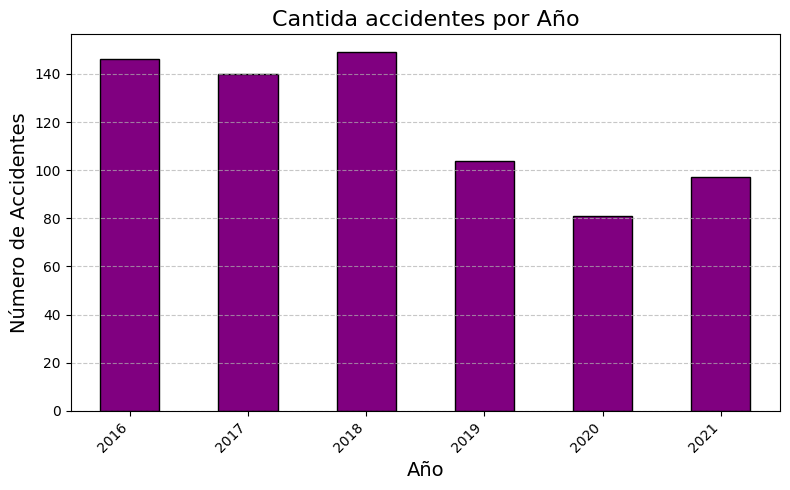

In [38]:
accidentes_por_año = data_siniestros['AAAA'].value_counts()

accidentes_por_año = accidentes_por_año.sort_index()

plt.figure(figsize=(8, 5))
accidentes_por_año.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Cantida accidentes por Año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de Accidentes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

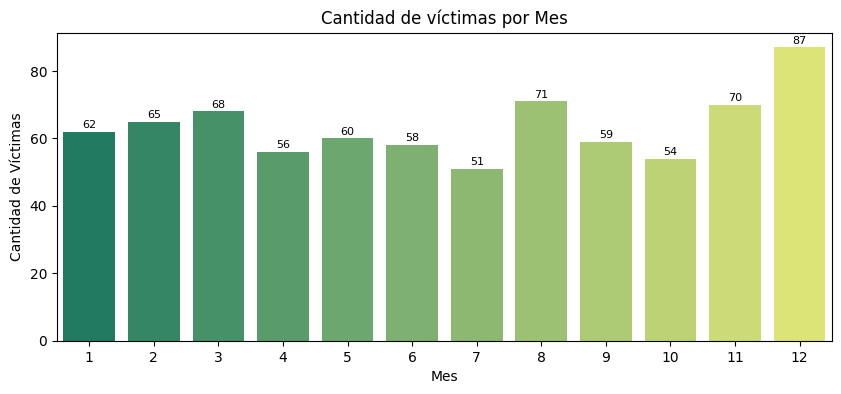

In [39]:
# Se agrupa por la cantidad de víctimas por mes 

data = data_siniestros.groupby(['MM'])['N_VICTIMAS'].sum().reset_index()
data["MM"]=data["MM"].astype("Int64")

plt.figure(figsize=(10,4))
ax = sns.barplot(x='MM', y='N_VICTIMAS', data=data, palette="summer")
ax.set_title('Cantidad de víctimas por Mes')
ax.set_xlabel('Mes') ; ax.set_ylabel('Cantidad de Víctimas')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

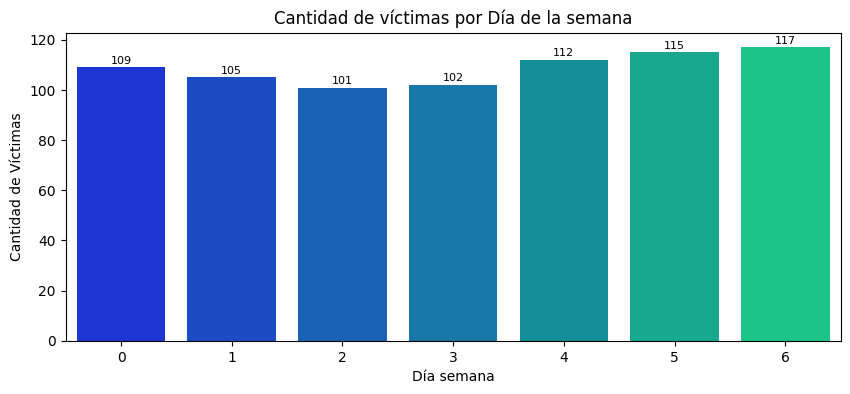

In [40]:
# Se agrupa por la cantidad de víctimas por dia semana


data = data_siniestros.groupby(['DIA_SEMANA'])['N_VICTIMAS'].sum().reset_index()
data = data.sort_values(by='DIA_SEMANA')
plt.figure(figsize=(10,4))

ax = sns.barplot(x='DIA_SEMANA', y='N_VICTIMAS', data=data, palette="winter")
ax.set_title('Cantidad de víctimas por Día de la semana')
ax.set_xlabel('Día semana') ; ax.set_ylabel('Cantidad de Víctimas')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

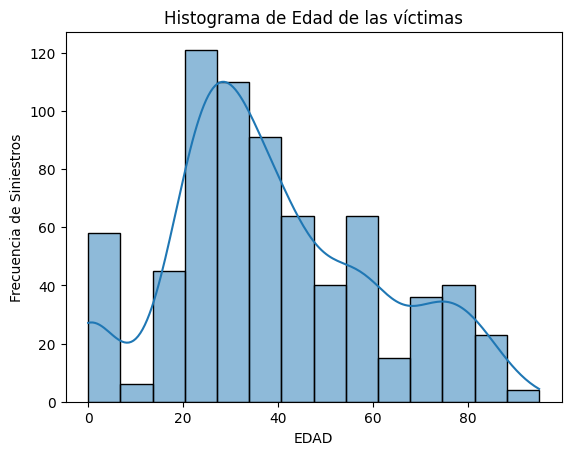

In [41]:
# Se grafica el histograma de la edad

sns.histplot(data_siniestros['EDAD'], kde=True) 
plt.title('Histograma de Edad de las víctimas') ; plt.ylabel('Frecuencia de Siniestros')

plt.show()

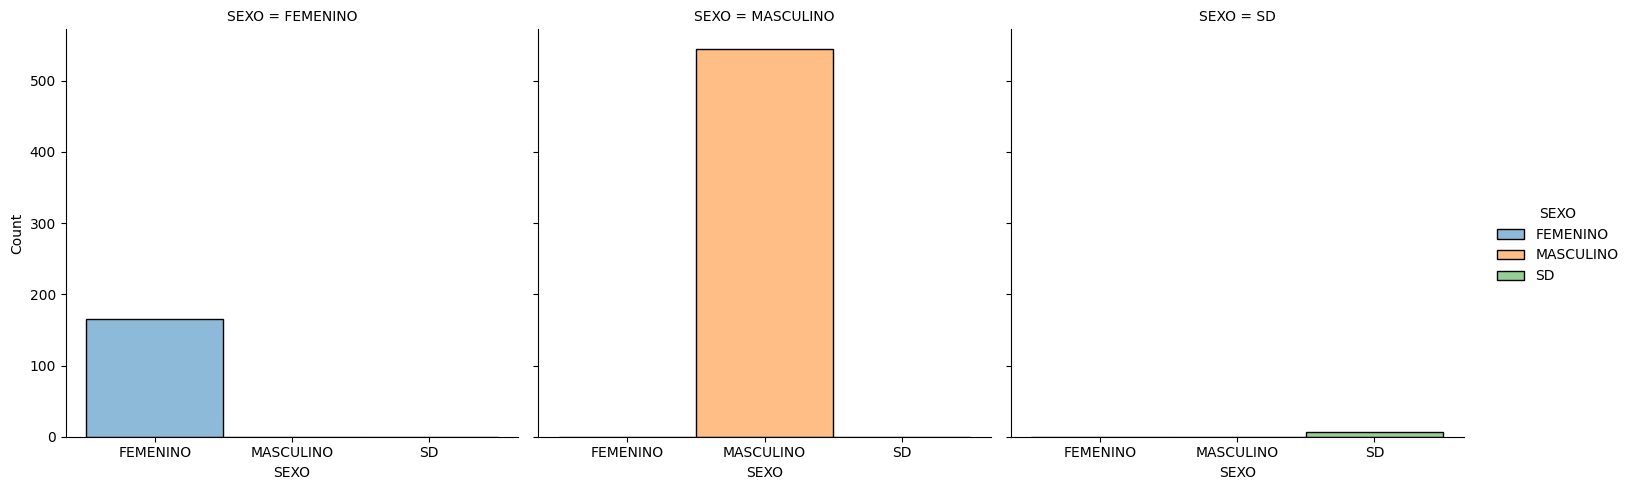

In [42]:
sns.displot(data=data_siniestros, x='SEXO', hue='SEXO', col='SEXO')

## Observamos en la grafica resultante que la cantidad de victimas masculinas es supera ampliamente las otras dos medidas.

In [43]:
# Guardamos el dataset limpio con el que trabajamos 
data_siniestros.to_csv('Analisis_homicidios.csv', index='False')